### Find most similar compounds within Enamine REAL using Ftrees

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from pathlib import Path
import os
import sys
from distutils.spawn import find_executable
import subprocess

import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from IPython.core.display import HTML

<IPython.core.display.Javascript object>

### Define input path for binary and library
Define constant that points to the data/ folder using absolute path in running computer (working dir indepedent).
* adapted from [ftrees ipynb](../code/ftrees/)

In [3]:
DATADIR = Path(_dh[0]) / "result_data"
print(DATADIR)

C:\Users\andre\Desktop\Arbeit_Charite\GitHub\covid19-SBapproach\focused_library_docking_screening_pipeline\result_data


<IPython.core.display.Javascript object>

In [4]:
# FTrees executable
# Replace with your absolute path if location is not standard
if sys.platform == "windows" or sys.platform == "win32":
    path_to_binary = (
        rf"{os.environ['LOCALAPPDATA']}\Programs\BioSolveIT\FTrees-6.0\FTrees.exe"
    )
else:
    path_to_binary = find_executable("Ftrees")
# fragment space
if not path_to_binary or not os.path.isfile(path_to_binary):
    raise ValueError("FTrees program cannot be found")
fspace = "REALspace_2019-12.space"
library = Path(_dh[0]).parent / "data" / f"{fspace}"
print(path_to_binary)
print(library)

C:\Users\andre\AppData\Local\Programs\BioSolveIT\FTrees-6.0\FTrees.exe
C:\Users\andre\Desktop\Arbeit_Charite\GitHub\covid19-SBapproach\data\REALspace_2019-12.space


<IPython.core.display.Javascript object>

### Set command line options

In [5]:
# Maximum number of top-ranking result molecules [1 to 1000000].
max_nof_results = 100
# Similarity threshold below which molecules are discarded [0.0 to 1.0].
min_sim_thresh = 0.8
# Desired target similarity to the query molecule [0.5 to 1.0]. Note: Must be >= '--minSimilarityThreshold'
target_sim = 1
# Required diversity between any two compounds in a solution set [0.9 to 1.0].
total_div = 0.95
# Generates 3d coordinates in case of SDF output files. 0 = off
gen_3d_output = 1

<IPython.core.display.Javascript object>

### Read top 5 molecules

In [9]:
# get molecule file
molecules_sdf = str(DATADIR / "docking_recommend_7_3D.sdf")
# Output base files (suffixes are required). Only '.sdf' and '.csv' are supported.
outfile_name = "sminadocking_top7_out"

<IPython.core.display.Javascript object>

,ID,ROMol
0,,
1,,
2,,
3,,
4,,
5,,
6,,

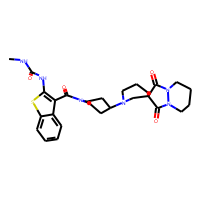
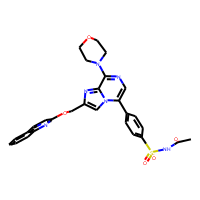
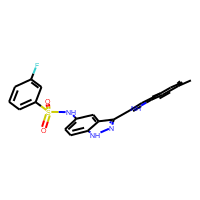
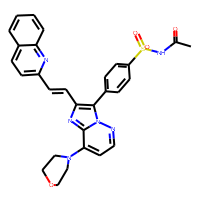
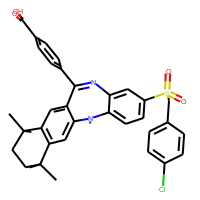
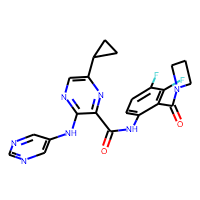
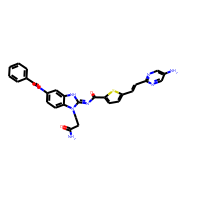

<IPython.core.display.Javascript object>

In [10]:
df_tmp = PandasTools.LoadSDF(molecules_sdf)
display(HTML(df_tmp.to_html()))

### Prepare system call

In [11]:
sys_call = [
    path_to_binary,
    "--input",
    molecules_sdf,
    "--searchFiles",
    library,
    "--maxNofResults",
    max_nof_results,
    "--outputFiles",
    DATADIR / f"{outfile_name}.sdf",
    "--minSimilarityThreshold",
    min_sim_thresh,
    "--targetSimilarity",
    target_sim,
    "--totalDiversity",
    total_div,
    "--gen3dOutput",
    gen_3d_output,
]
print(*sys_call)

C:\Users\andre\AppData\Local\Programs\BioSolveIT\FTrees-6.0\FTrees.exe --input C:\Users\andre\Desktop\Arbeit_Charite\GitHub\covid19-SBapproach\focused_library_docking_screening_pipeline\result_data\docking_recommend_7_3D.sdf --searchFiles C:\Users\andre\Desktop\Arbeit_Charite\GitHub\covid19-SBapproach\data\REALspace_2019-12.space --maxNofResults 100 --outputFiles C:\Users\andre\Desktop\Arbeit_Charite\GitHub\covid19-SBapproach\focused_library_docking_screening_pipeline\result_data\sminadocking_top7_out.sdf --minSimilarityThreshold 0.8 --targetSimilarity 1 --totalDiversity 0.95 --gen3dOutput 1


<IPython.core.display.Javascript object>

In [12]:
# run
out = subprocess.check_output([str(x) for x in sys_call])
out

b'\r\nQueryMolecule:  (1) \tnofMatches: 100\r\n   matching molecule: m_275030____14114078____14125676____14147198 \t   source: REALspace_2019-12 \t   similarity: 0.952905\r\n   matching molecule: m_275030____14114236____14125180____14148780 \t   source: REALspace_2019-12 \t   similarity: 0.933513\r\n   matching molecule: m_275030____14114078____14125982____14147198 \t   source: REALspace_2019-12 \t   similarity: 0.925896\r\n   matching molecule: m_275030____14114236____14125180____14146146 \t   source: REALspace_2019-12 \t   similarity: 0.925466\r\n   matching molecule: m_275030____14114236____14128248____14146862 \t   source: REALspace_2019-12 \t   similarity: 0.922568\r\n   matching molecule: m_275030____14114032____14126114____14146516 \t   source: REALspace_2019-12 \t   similarity: 0.921762\r\n   matching molecule: m_275030____14114032____14126114____14146794 \t   source: REALspace_2019-12 \t   similarity: 0.919753\r\n   matching molecule: m_275030____14114236____14125180____141466

<IPython.core.display.Javascript object>

### Append the result from the the individual result files

In [13]:
from os import listdir

# list data
all_files = [f for f in listdir(DATADIR)]
# print(all_files)
# collect frames
frames = []

for file in all_files:
    if file.startswith(outfile_name):
        print(file)
        df = PandasTools.LoadSDF(str(DATADIR / file))
        frames.append(df)
result = pd.concat(frames, ignore_index=True, sort=False)
result.shape

sminadocking_top7_out_1.sdf
sminadocking_top7_out_2.sdf
sminadocking_top7_out_3.sdf
sminadocking_top7_out_4.sdf
sminadocking_top7_out_5.sdf
sminadocking_top7_out_6.sdf
sminadocking_top7_out_7.sdf


(700, 16)

<IPython.core.display.Javascript object>

In [14]:
result.head()

,result-rank,similarity,query-name,query-smiles,source,similarity-descriptor,similarity-descriptor-smiles,reaction-name,reagent1-name,reagent1-smiles,reagent2-name,reagent2-smiles,reagent3-name,reagent3-smiles,ID,ROMol
0,1,0.953,,S1c2c(cccc2)C(C(=O)N3CCC([N@H+]4CC5(C(=O)N6N(C...,REALspace_2019-12,0.986;0.940;1.000;0.859;0.998;0.994;1.000;0.94...,C1CCCCNC1;C1=CccC(N1)=O;c1ccccc1;O=C1NCC(N1C)=...,m_275030,14114078,[R2*]N1CC2(CN([R1*])CCCC2)CC1,14125676,[R1*]C(=O)C=1NC(=O)c2c(cccc2)C1,14147198,[R2*]CCN1C(=O)NC2(C1=O)CCCC2,m_275030____14114078____14125676____14147198,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
1,2,0.934,,S1c2c(cccc2)C(C(=O)N3CCC([N@H+]4CC5(C(=O)N6N(C...,REALspace_2019-12,0.999;0.940;1.000;0.780;0.936;0.973;1.000;0.94...,N1CCCCC1;O=C1ccC=CN1;c1ccccc1;C1=NC=NO1;C1CC[N...,m_275030,14114236,[R2*]N1CC(C2CN([R1*])CCC2)CC1,14125180,[R1*]C(=O)C=1c2c(cccc2)C(=O)NC1,14148780,[R2*]CC=1ON=C(N1)CC2CC2,m_275030____14114236____14125180____14148780,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
2,3,0.926,,S1c2c(cccc2)C(C(=O)N3CCC([N@H+]4CC5(C(=O)N6N(C...,REALspace_2019-12,0.986;0.899;0.926;0.859;0.998;0.994;1.000;0.89...,N1CCCCCC1;c1cC=CN1;Fc1ccccc1;CN1C(CNC1=O)=O;C1...,m_275030,14114078,[R2*]N1CC2(CN([R1*])CCCC2)CC1,14125982,[R1*]C(=O)C=1Nc2c(F)ccc(c2C1)C,14147198,[R2*]CCN1C(=O)NC2(C1=O)CCCC2,m_275030____14114078____14125982____14147198,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
3,4,0.925,,S1c2c(cccc2)C(C(=O)N3CCC([N@H+]4CC5(C(=O)N6N(C...,REALspace_2019-12,0.999;0.940;1.000;0.637;0.982;0.984;1.000;0.94...,N1CCCCC1;O=C1ccC=CN1;c1ccccc1;CC=O;C1CC[NH+]C1...,m_275030,14114236,[R2*]N1CC(C2CN([R1*])CCC2)CC1,14125180,[R1*]C(=O)C=1c2c(cccc2)C(=O)NC1,14146146,[R2*]CC(=O)N(C1CC1)CC,m_275030____14114236____14125180____14146146,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."
4,5,0.923,,S1c2c(cccc2)C(C(=O)N3CCC([N@H+]4CC5(C(=O)N6N(C...,REALspace_2019-12,0.999;0.857;1.000;0.792;0.936;0.999;0.999;0.85...,N1CCCCC1;O=C1ccCCN1;c1ccccc1;C(=O)NCC=O;C1CC[N...,m_275030,14114236,[R2*]N1CC(C2CN([R1*])CCC2)CC1,14128248,[R1*]C(=O)C1c2c(cccc2)C(=O)NC1,14146862,[R2*]CC(=O)NCC(=O)N1CCCC1,m_275030____14114236____14128248____14146862,"<img src=""data:image/png;base64,iVBORw0KGgoAAA..."


<IPython.core.display.Javascript object>

In [15]:
fname = str(DATADIR / f"{outfile_name}_enamineREAL_combined.sdf")
PandasTools.WriteSDF(result, fname)

<IPython.core.display.Javascript object>